In [11]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, segmentation, feature, future
from sklearn.ensemble import RandomForestClassifier
from functools import partial
from sklearn.model_selection import train_test_split
from PIL import Image
import os
import matplotlib.pyplot as plt
import random


In [12]:
image_dir = r'C:/users/comi/Desktop/Wound_segmentation_III/Data/new_images_640_1280'
mask_dir = r'C:/users/comi/Desktop/Wound_segmentation_III/Data/new_masks_640_1280'

image_filenames = os.listdir(image_dir)
mask_filenames = os.listdir(mask_dir)

# Ensure image and mask names correspond
image_filenames.sort()
mask_filenames.sort()


In [13]:
def load_images_and_masks(image_dir, mask_dir, image_filenames, mask_filenames):
    images = []
    masks = []
    
    for img_file, mask_file in zip(image_filenames, mask_filenames):
        # Load images and masks
        img = Image.open(os.path.join(image_dir, img_file))
        mask = Image.open(os.path.join(mask_dir, mask_file))
        
        # Convert images to numpy arrays (you can normalize them here if needed)
        img = np.array(img)
        mask = np.array(mask)
        
        images.append(img)
        masks.append(mask)
    
    return np.array(images), np.array(masks)

images, masks = load_images_and_masks(image_dir, mask_dir, image_filenames, mask_filenames)


KeyboardInterrupt: 

In [14]:
X_train, X_val, y_train, y_val = train_test_split(images, masks, test_size=0.2)

print(f"Training images: {len(X_train)}, Validation images: {len(X_val)}")


Training images: 1600, Validation images: 401


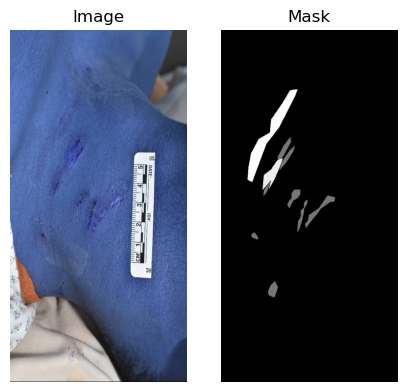

In [20]:

def visualize_image_with_label(images, masks):
    # Pick a random index
    idx = random.randint(0, len(images) - 1)
    
    # Extract the corresponding image and mask
    img = images[idx]
    mask = masks[idx]
    
    # Plot the image and its mask side by side
    plt.figure(figsize=(5, 5))
    
    # Display the image
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Image')
    plt.axis('off')
    
    # Display the corresponding mask
    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='gray')
    plt.title('Mask')
    plt.axis('off')
    
    plt.show()

# Call the function to visualize a random image and its label
visualize_image_with_label(X_train, y_train)


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Assume X_train, y_train are already loaded as numpy arrays

# Flatten images and masks
X_train_flat = X_train.reshape(-1, X_train.shape[-1])  # Shape: (num_pixels, num_features)
y_train_flat = y_train.flatten()  # Shape: (num_pixels,)

# Train-test split for RandomForest (on a pixel basis)
X_train_pixel, X_val_pixel, y_train_pixel, y_val_pixel = train_test_split(
    X_train_flat, y_train_flat, test_size=0.2, random_state=42
)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf.fit(X_train_pixel, y_train_pixel)


In [ ]:
# Pick a validation image (first one as an example)
val_image = X_val[0]

# Flatten the validation image
val_image_flat = val_image.reshape(-1, val_image.shape[-1])

# Predict the mask for the validation image
predicted_mask_flat = rf.predict(val_image_flat)

# Reshape the predicted mask back to the original image shape
predicted_mask = predicted_mask_flat.reshape(val_image.shape[0], val_image.shape[1])


In [ ]:
# Visualize the original image and its predicted mask
plt.figure(figsize=(10, 5))

# Display the image
plt.subplot(1, 2, 1)
plt.imshow(val_image, cmap='gray')
plt.title('Validation Image')
plt.axis('off')

# Display the predicted mask
plt.subplot(1, 2, 2)
plt.imshow(predicted_mask, cmap='gray')
plt.title('Predicted Mask')
plt.axis('off')

plt.show()
